C:\Users\ashwi\AppData\Local\Temp\ipykernel_54020\3907834426.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Category', palette='Set2')


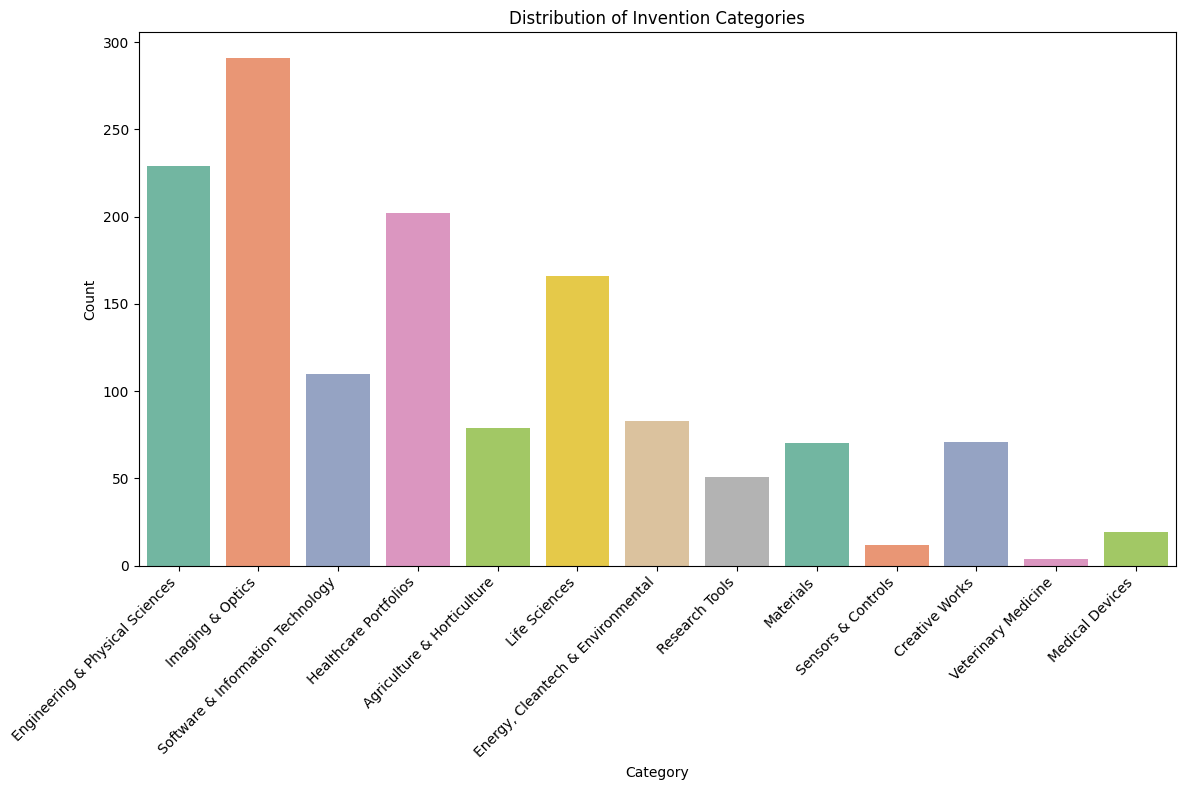

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("cleaned_inventions_dataset1.csv")
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Category', palette='Set2')

plt.title('Distribution of Invention Categories')
plt.xlabel('Category')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()

plt.show()

C:\Users\ashwi\AppData\Local\Temp\ipykernel_54020\3131517678.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_df[tfidf_top_words[category]].mean(), y=tfidf_top_words[category], ax=axes[idx], palette='Set3')
C:\Users\ashwi\AppData\Local\Temp\ipykernel_54020\3131517678.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_df[tfidf_top_words[category]].mean(), y=tfidf_top_words[category], ax=axes[idx], palette='Set3')
C:\Users\ashwi\AppData\Local\Temp\ipykernel_54020\3131517678.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.bar

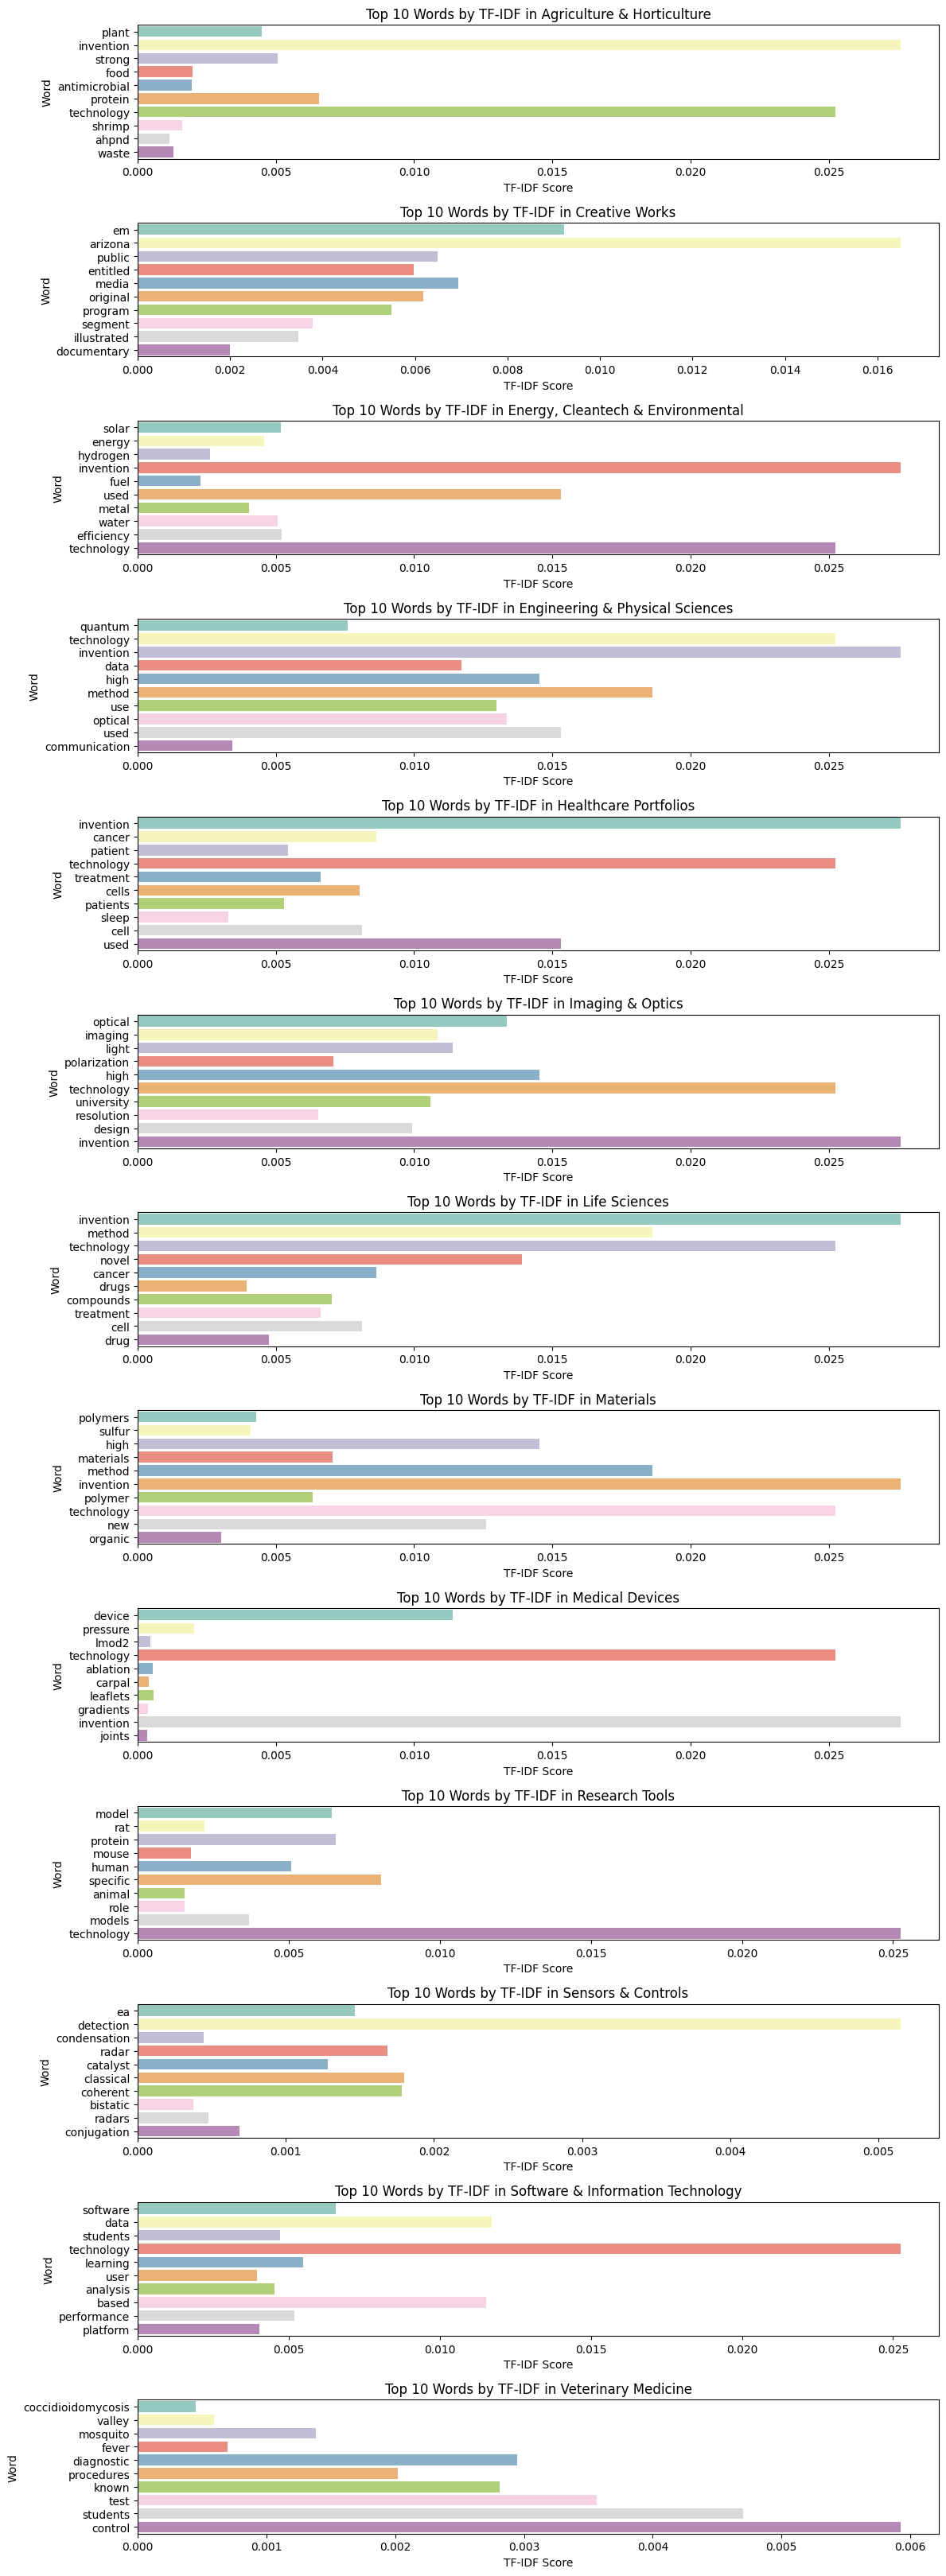

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

data = pd.read_csv("cleaned_inventions_dataset1.csv")

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['Description'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

tfidf_df['Category'] = data['Category']
top_n = 10
tfidf_top_words = tfidf_df.groupby('Category').mean().apply(lambda x: x.nlargest(top_n).index, axis=1)
fig, axes = plt.subplots(nrows=len(tfidf_top_words), ncols=1, figsize=(12, 2.5 * len(tfidf_top_words)))

for idx, category in enumerate(tfidf_top_words.index):
    sns.barplot(x=tfidf_df[tfidf_top_words[category]].mean(), y=tfidf_top_words[category], ax=axes[idx], palette='Set3')
    axes[idx].set_title(f'Top {top_n} Words by TF-IDF in {category}')
    axes[idx].set_xlabel('TF-IDF Score')
    axes[idx].set_ylabel('Word')
plt.tight_layout()
plt.show()


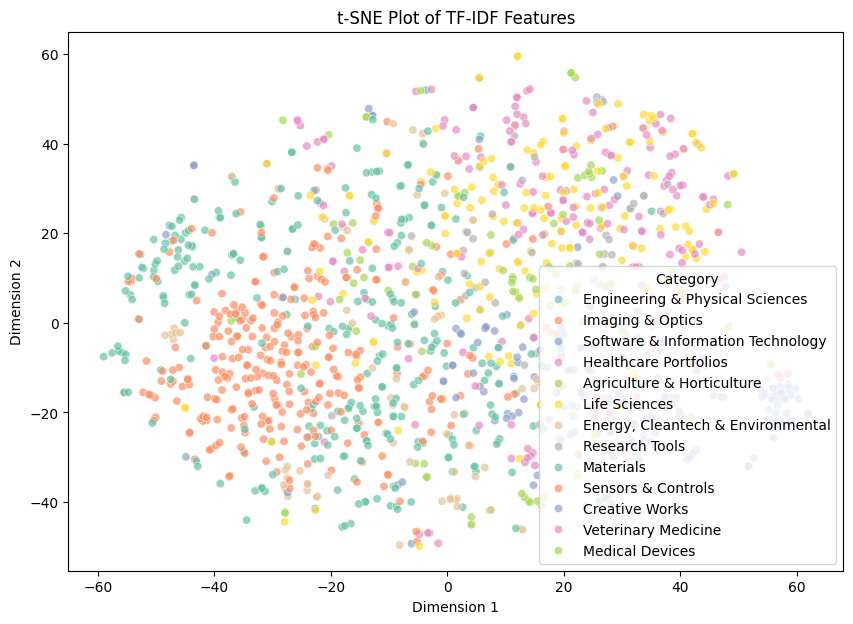

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(tfidf_matrix.toarray())
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Category'] = data['Category']

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Category', data=tsne_df, palette='Set2', alpha=0.7)
plt.title('t-SNE Plot of TF-IDF Features')
plt.show()


In [26]:
from keybert import KeyBERT

description = """
This technology is an advanced cybersecurity tool called Occupational Knowledge-Based Authentication (Occu-KBA). It enhances traditional identity verification methods by using occupation-specific questions. For instance, a doctor might be asked about medical terminology, while an accountant could face questions about financial regulations. By leveraging recent advancements in generative artificial intelligence (Gen-AI) and large language models like ChatGPT, it dynamically generates unique challenge questions tailored to the user's professional knowledge and experience, ensuring only those with genuine expertise can successfully authenticate. Occu-KBA also incorporates behavioral analytics, evaluating not just the correctness of answers but also how users interact with their devices while answering. This multi-factor approach enhances security, making it significantly harder to breach. The tool can seamlessly integrate with existing systems, providing a more personalized and secure user experience across various industries such as finance, healthcare, e-commerce, and government services. This solution effectively addresses the common challenges of traditional methods, such as forgotten answers and compromised databases, and offers robust protection against family-and-friends fraud.
"""
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(description, keyphrase_ngram_range=(1, 2), stop_words='english', top_n=10)
for keyword, score in keywords:
    print(f"{keyword} (Score: {score})")

personalized secure (Score: 0.5283)
identity verification (Score: 0.4724)
authentication occu (Score: 0.4706)
authentication (Score: 0.4573)
based authentication (Score: 0.4504)
secure user (Score: 0.4397)
authenticate occu (Score: 0.4353)
security (Score: 0.4157)
authenticate (Score: 0.4153)
security making (Score: 0.4068)
